In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [7]:
#For FN angle averaged PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [8]:
#Multiply weight matrix (MWM) to each angle data

final_out = []
for a in range(8):
    out = Wa @ data_cat_sm[a]
    final_out.append(out)

final_out = np.array(final_out)

In [9]:
#Adjust MWM by subtract data point at -300 to -200ms

tmep_final = np.transpose(final_out,[2,0,1])
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :, :], 600, axis=0)
nfinal_out = np.transpose(tmep_final - sTemplet, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms

tmep_final = PCA_total['p']
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :], 600, axis=0)
nPCA_out = tmep_final.T - sTemplet.T

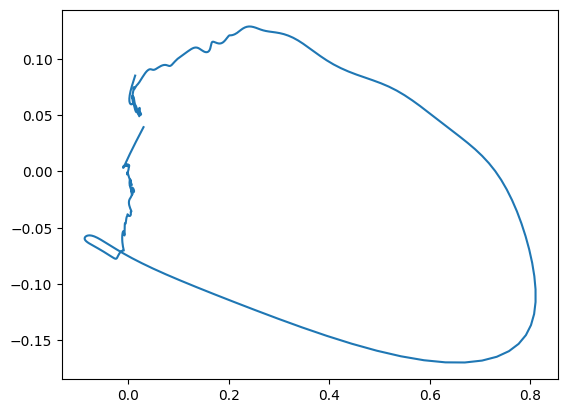

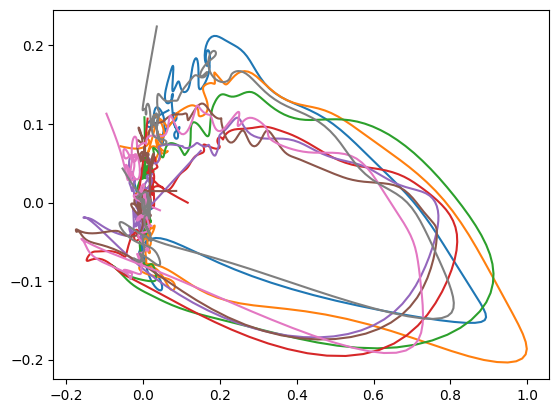

In [10]:
# Plotting

plt.figure()
plt.plot(nPCA_out[0], nPCA_out[1])

plt.figure()
for a in range(8):
    plt.plot(nfinal_out[a][0], nfinal_out[a][1])

In [11]:
# Fitting

pca_p = nPCA_out[:4]
time = np.linspace(-300, 300, 600)

r_s_total = []
for a in range(8):
    resid = np.linalg.norm(pca_p - nfinal_out[a], axis=1)**2
    r_s = 1 - resid / (final_out[a].size * nfinal_out[a].var())
    r_s_total.append(r_s)

r_s_total = np.array(r_s_total)

Text(0.5, 1.0, 'direction=4, pc=0, R^2=0.9756770942464006')

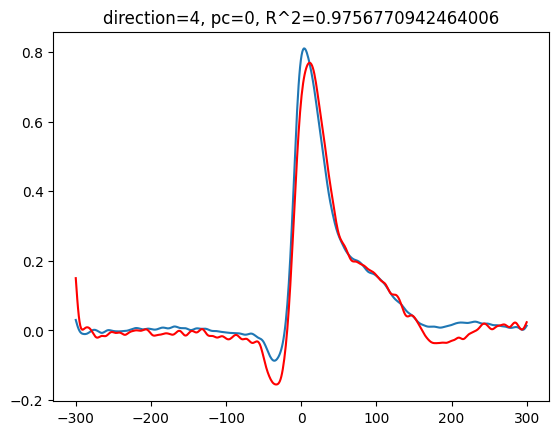

In [23]:
# Plotting

a = 4
b = 0

r_s = r_s_total[a][b]
plt.plot(time, pca_p[b], time, nfinal_out[a][b], 'r')
plt.title(f'direction={a}, pc={b}, R^2={r_s}')

## Onset delay

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

val_cat = np.array(val_cat)[:,:8]
data_cat = np.array(data_cat)[:, :8]

In [4]:
onset_delay.shape

(67, 8)

In [7]:
onset_delay[0]

array([[ 0.03 ],
       [ 0.03 ],
       [ 0.006],
       [ 0.002],
       [-0.01 ],
       [ 0.006],
       [ 0.022],
       [ 0.042]])

In [3]:
p = np.corrcoef(onset_delay)-1

In [2]:
import preprecessing_distMat

pdm = preprecessing_distMat.preprecessing_distMat(Ts, data_cat, val_cat, save_path)
onset_delay = pdm.peak_delay(win=20)
p_t = pdm.peak_MDS(onset_delay)

C:\Users\IBS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [9]:
# Onset delay

from scipy.ndimage import gaussian_filter1d

Ts = 1000
win = 20 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
# b=[2,3,9,15,14,13,7,1];
# label_ori={'Up','Up right', 'Right', 'Down right',...
#     'Down', 'Down left', 'Left', 'Up left'};

peak_all = []
for data_num in range(np.shape(data_cat)[0]):

    valcat_t = val_cat[data_num]
    datacat_t = data_cat[data_num]

    peak = []
    for a in range(8):

        # Peak
        vv = np.mean(valcat_t[a], axis = 0)
        I = np.where(max(vv) == vv)[0][0]
        s_temp = gaussian_filter1d(np.sum(datacat_t[a], axis = 0), win)
        I2 = np.where(max(s_temp) == s_temp)[0][0]
        peak.append(I2 - I)

    peak_all.append(peak)

onset_delay = np.array(peak_all) / Ts

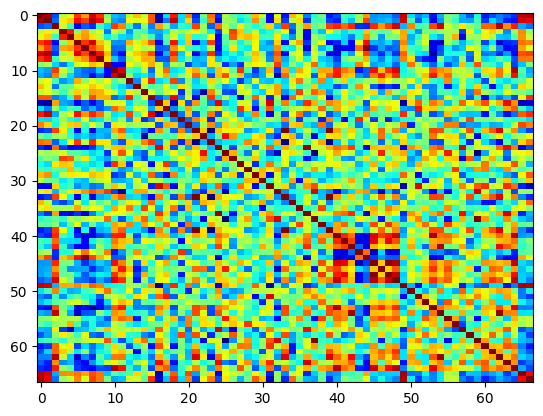

In [10]:
p = np.corrcoef(onset_delay)-1

plt.imshow(p, aspect='auto', cmap='jet', origin='upper') 

In [9]:
# a=24
# t = np.arange(-250,250)
# plt.plot(t, pFN[a], t, pMPC @ betas[a], 'r')
# resid = np.linalg.norm(pMPC @ betas[a] - pFN[a])**2
# r_s = 1 - resid / (pFN[a].size * pFN[a].var())
# plt.title(f'a={a}, R^2={r_s}')

NameError: name 'pFN' is not defined